In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# dataset example to see the columns
table=pd.read_csv('../Final/Berlin/2020-08-30_listings.csv')
table.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [4]:
pd.set_option("display.max_columns", 80) 
table.tail(6)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
20426,45186493,https://www.airbnb.com/rooms/45186493,20200830153825,2020-09-01,Beautiful apartment in Kreuzberg,Located in the beautiful and trendy Kreuzberg ...,NaN,https://a0.muscache.com/pictures/55a5ac8e-e201...,340202482,https://www.airbnb.com/users/show/340202482,Clyde,2020-03-04,DE,NaN,within a day,50%,100%,f,https://a0.muscache.com/im/pictures/user/ef716...,https://a0.muscache.com/im/pictures/user/ef716...,NaN,1.0,1.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,t,NaN,nördliche Luisenstadt,Friedrichshain-Kreuzberg,52.50502,13.43305,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,NaN,"[""Hangers"", ""Iron"", ""Kitchen"", ""Laptop-friendl...",$22.00,6,20,6.0,6.0,1125.0,1125.0,6.0,1125.0,NaN,t,0,0,0,270,2020-09-01,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
20427,45188959,https://www.airbnb.com/rooms/45188959,20200830153825,2020-09-01,Cosy and huge room in a 70m2 apartment,"Dear Guests,<br />I would like to propose you ...","Treptower Park, Warschaeur, Alexanderplatz or ...",https://a0.muscache.com/pictures/495e08fa-dc56...,55437697,https://www.airbnb.com/users/show/55437697,Shemsi,2016-01-20,"Paris, Île-de-France, France",NaN,within a few hours,100%,84%,f,https://a0.muscache.com/im/pictures/user/74ac0...,https://a0.muscache.com/im/pictures/user/74ac0...,NaN,3.0,3.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,t,"Berlin, Germany",Alt-Lichtenberg,Lichtenberg,52.51471,13.49406,Private room in apartment,Private room,3,NaN,1 shared bath,1.0,1.0,"[""Hangers"", ""Babysitter recommendations"", ""Dis...",$36.00,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,0,30,305,2020-09-01,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,1,1,0,NaN
20428,45189970,https://www.airbnb.com/rooms/45189970,20200830153825,2020-09-01,Cheapest Two Bed Room Hotel in the Whole Area,This Berlin central hotel is going to be your ...,How would you feel the neighborhood at Märkisc...,https://a0.muscache.com/pictures/8b473944-4e71...,364552831,https://www.airbnb.com/users/show/364552831,Maxim,2020-08-26,DE,NaN,NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/ea77a...,https://a0.muscache.com/im/pictures/user/ea77a...,NaN,1.0,1.0,"['phone', 'jumio', 'offline_government_id', 's...",t,t,"Berlin, Germany",Alexanderplatz,Mitte,52.52736,13.38679,Room in hotel,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Hangers"", ""Iron"", ""Lock on bedroom door"", ""S...",$33.00,2,31,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,30,56,86,144,2020-09-01,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,5,0,5,0,NaN
20429,45190519,https://www.airbnb.com/rooms/45190519,20200830153825,2020-09-01,Am Alexanderplatz mit Blick auf den Fernsehturm!,"Schöne Wohnun

In [5]:
pd.set_option("display.max_rows", 80) 
table.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               32
description                                       514
neighborhood_overview                            9246
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                          12
host_since                                         12
host_location                                      64
host_about                                      10036
host_response_time                              10300
host_response_rate                              10300
host_acceptance_rate                             6815
host_is_superhost                                  12
host_thumbnail_url          

In [6]:
dates=['2020-08-30','2020-06-13', '2020-05-14','2020-04-17','2020-03-17','2020-02-18','2020-01-10',
      '2019-12-11','2019-11-12','2019-10-16','2019-09-19','2019-08-12','2019-07-11','2019-06-08',
       '2019-05-14','2019-04-11','2019-03-08','2019-02-06','2019-01-14','2018-12-10','2018-11-07',
       '2018-10-10','2018-09-12','2018-08-14','2018-07-10','2018-06-09','2018-05-14','2018-04-12',
       '2017-05-08','2017-04-08','2017-03-06','2017-02-10','2017-01-06','2016-12-08','2016-11-07',
       '2016-10-04','2016-09-05','2016-08-04','2016-07-05','2016-06-03','2016-05-03','2016-04-04',
       '2016-02-04','2016-01-04', '2015-12-05','2015-11-08','2015-10-03']


In [24]:
main_columns=['id','latitude','longitude','host_id','host_since','room_type','neighbourhood_cleansed',
              'neighbourhood_group_cleansed','review_scores_location', 'price',
              'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
              'review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value',
              'calculated_host_listings_count','calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms']

In [25]:
def merging_dates(list_dates):
    df=pd.read_csv(f'../Final/Berlin/{list_dates[0]}_listings.csv', low_memory=False)[main_columns].copy()
    df=df.assign(date = pd.to_datetime(list_dates[0], format='%Y-%m-%d'))
    for date in list_dates[1:]:
        df2=pd.read_csv(f'../Final/Berlin/{date}_listings.csv', low_memory=False)[main_columns].copy()
        df2=df2.assign(date = pd.to_datetime(date, format='%Y-%m-%d'))
        df=pd.concat([df,df2])
        
    df=df.sort_values(by='date').reset_index(drop=True)
    
    return df
        

In [26]:
# Actual merging 
# dont run if not necessary

newdf=merging_dates(dates)

KeyError: "['calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_entire_homes'] not in index"

In [16]:
newdf

,id,latitude,longitude,host_id,host_since,room_type,neighbourhood_cleansed,neighbourhood_group_cleansed,review_scores_location,price,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,date
0,2602460,52.600097,13.329716,13315290,2014-03-19,Entire home/apt,MV 2,Reinickendorf,9.0,$52.00,2015-09-15,93.0,9.0,10.0,10.0,10.0,9.0,9.0,1,2015-10-03
1,3637595,52.491101,13.413592,4094666,2012-11-08,Entire home/apt,Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,10.0,$60.00,2015-09-30,98.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2015-10-03
2,6160418,52.496030,13.379904,1718617,2012-02-08,Entire home/apt,Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,8.0,$65.00,2015-05-05,100.0,10.0,10.0,10.0,10.0,8.0,8.0,2,2015-10-03
3,3588362,52.493484,13.396929,16739581,2014-06-13,Entire home/apt,Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,9.0,$199.00,2015-09-14,87.0,9.0,10.0,9.0,8.0,9.0,8.0,2,2015-10-03
4,6655897,52.488711,13.416655,34836886,2015-06-02,Entire home/apt,Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,10.0,$50.00,2015-07-18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2015-10-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005463,31386775,52.523150,13.387480,1581930,2012-01-08,Entire home/apt,Alexanderplatz,Mitte,10.0,$286.00,2020-06-04,97.0,10.0,10.0,9.0,9.0,10.0,9.0,2,2020-08-30
1005464,31394785,52.519180,13.442950,58756297,2016-02-14,Private room,Karl-Marx-Allee-Nord,Friedrichshain-Kreuzberg,10.0,$33.00,2020-03-04,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2020-08-30
1005465,31397673,52.481740,13.362710,235168007,2019-01-08,Entire home/apt,Schöneberg-Süd,Tempelhof - Schöneberg,10.0,$56.00,2020-08-16,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2020-08-30
1005466,31381908,52.511890,13.418590,4713459,2013-01-15,Private room,Alexanderplatz,Mitte,10.0,$55.00,2020-03-10,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2020-08-30


In [17]:
###Cleaning some columns

In [18]:
#round latitude and longitude

newdf[['latitude','longitude']]=newdf[['latitude','longitude']].round(decimals=5)

In [19]:
#clean the price

newdf.price=pd.to_numeric(newdf.price.str.replace('$','').str.replace(',',''))

In [20]:
airbnbs=newdf.groupby(['date', 'room_type'], as_index=False).count()

In [21]:
airbnbs

,date,room_type,id,latitude,longitude,host_id,host_since,neighbourhood_cleansed,neighbourhood_group_cleansed,review_scores_location,price,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count
0,2015-10-03,Entire home/apt,9337,9337,9337,9337,9334,9337,9337,7685,9337,7797,7703,7678,7679,7678,7677,7685,7682,9337
1,2015-10-03,Private room,5841,5841,5841,5841,5839,5841,5841,4206,5841,4303,4226,4202,4202,4203,4201,4206,4204,5841
2,2015-10-03,Shared room,195,195,195,195,195,195,195,115,195,120,116,115,115,115,115,115,115,195
3,2015-11-08,Entire home/apt,9563,9563,9563,9563,9560,9563,9563,7834,9563,7955,7855,7826,7823,7825,7830,7834,7832,9563
4,2015-11-08,Private room,5878,5878,5878,5878,5873,5878,5878,4266,5878,4370,4285,4263,4265,4264,4262,4266,4265,5878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2020-06-13,Shared room,307,307,307,307,307,307,307,225,307,233,225,225,225,225,225,225,225,307
148,2020-08-30,Entire home/apt,11047,11047,11047,11047,11042,11047,11047,8792,11047,8998,8808,8796,8798,8792,8796,8792,8791,11047
149,2020-08-30,Hotel room,236,236,236,236,236,236,236,171,236,171,171,171,171,171,171,171,171,236
150,2020-08-30,Private room,8870,8870,8870,8870,8863,8870,8870,6954,8870,7191,6969,6961,6960,6952,6959,6954,6952,8870


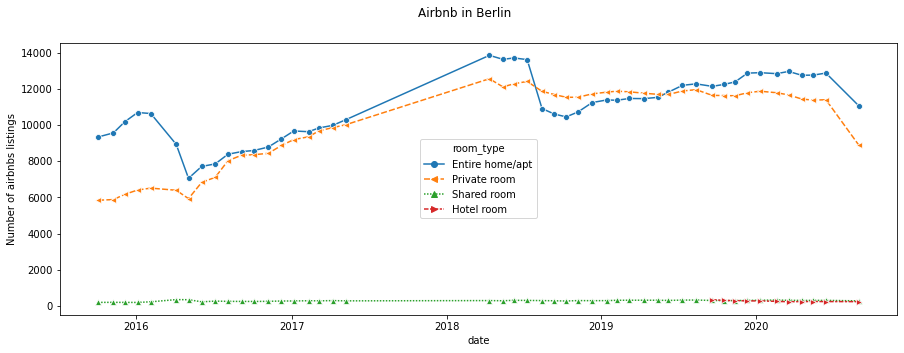

In [22]:
# have a look on the number of airbnbs data through time

fig, ax1 = plt.subplots(figsize=(15,5))



sns.lineplot(x = "date", y = "id", data = airbnbs, hue = "room_type",
             style = "room_type", markers = ["o", "<", "^",'>'],  legend="brief",)


ax1.set_ylabel('Number of airbnbs listings')
fig.suptitle("Airbnb in Berlin")
fig.savefig("Listings in Berlin.png")




In [23]:
# save file 
# dont run if not necessary

name='id_date'

newdf.to_csv(f'../Final/Berlin/merge_data_files/{name}.csv') 

In [ ]:
#### lock data from dataset depending on the variable

In [28]:
#function for locking a dataset 
# column its a string
#argument is a list 


def lock_data(column, argument):
    df=pd.concat([newdf.loc[newdf[column]==i] for i in argument])
    return df

In [29]:
#lock data from entire/apt
lockdf=lock_data('room_type', ['Entire home/apt'])#.to_csv('../Final/Berlin/merge_data_files/Entire_home_apt.csv') 

In [ ]:
lockdf

In [ ]:
# have a look on the number of airbnbs data through time

fig, ax1 = plt.subplots(figsize=(15,5))

airbnbs=lockdf.groupby('date').count()

ax1.plot(airbnbs['latitude'] , color='r')
ax1.set_ylabel('number of entire apartments on airbnbs',color='r')

In [ ]:
# dataframe for ploting


df_forplotting=newdf.copy()
df_forplotting['date']=df_forplotting['date'].apply(lambda x: x.strftime('%Y-%m'))


In [ ]:
df_forplotting.nunique()

In [ ]:
#ploting through time
#dont run if necessary

fig = px.density_mapbox(df_forplotting, lat='latitude', lon='longitude',
                        animation_frame="date", radius=1,
                        mapbox_style="stamen-terrain")
fig.update_layout(
    title={'text': "Airbnbs density map in Berlin "})
fig.show()
fig.write_html("../Final/density_map.html")